# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
df.shape

(10683, 11)

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

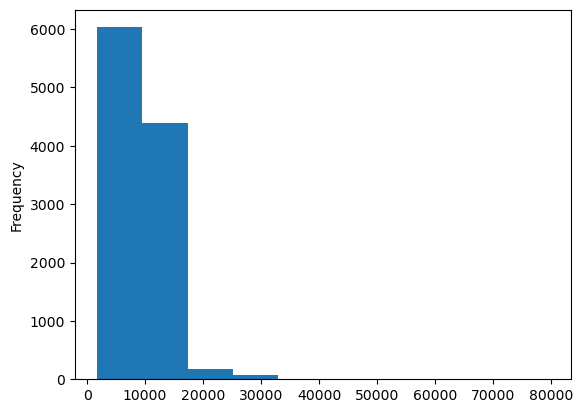

In [11]:

df['Price'].plot(kind='hist')

plt.show()

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [13]:
max_price = df['Price'].max()
min_price = df['Price'].min()

print('Price Range = ',max_price - min_price)
print('Maximum Price = ',max_price)
print('Minimum Price = ',min_price)

Price Range =  77753
Maximum Price =  79512
Minimum Price =  1759


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

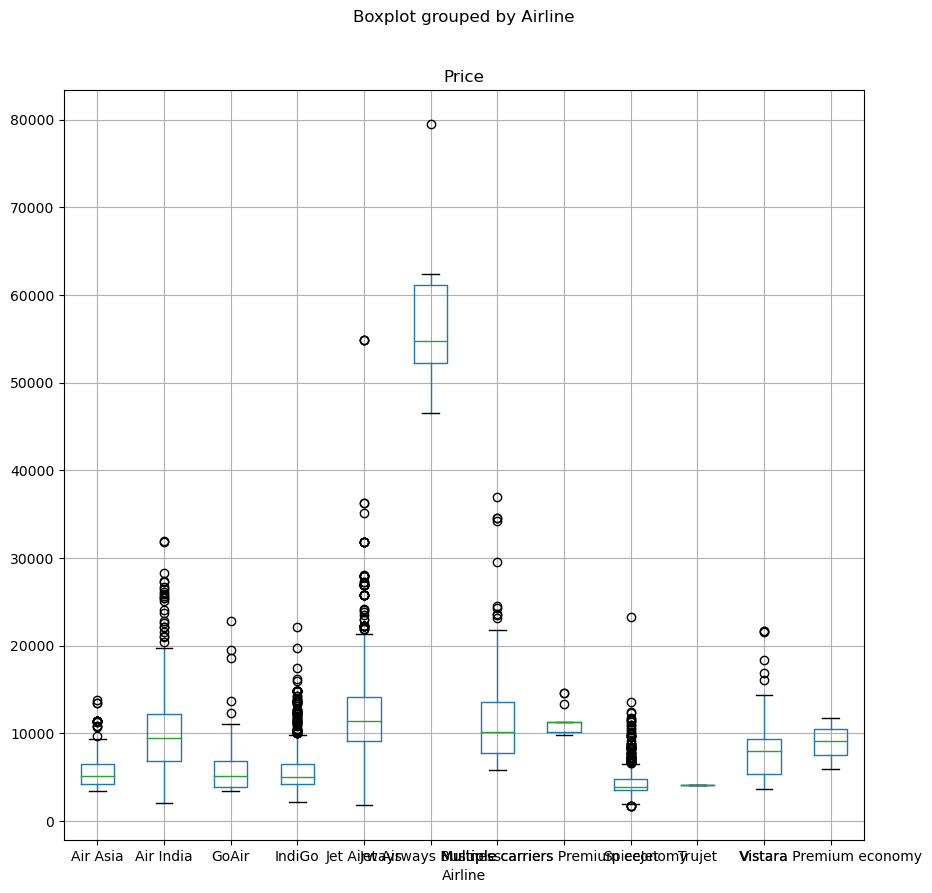

In [19]:
df.boxplot(column='Price',by='Airline',figsize=(10,10))
plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

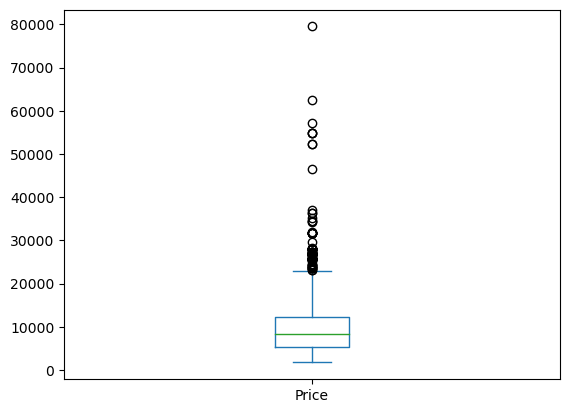

In [21]:
df['Price'].plot.box()
plt.show()

Price feature has many outliers. This is because many flights travels small distances within India but the outlier flight must be travel long-long distances around the glob.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [39]:
df['Date_of_Journey'] = df['Date_of_Journey'].apply(pd.to_datetime)

/tmp/ipykernel_1464/2291162260.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = df['Date_of_Journey'].apply(pd.to_datetime)


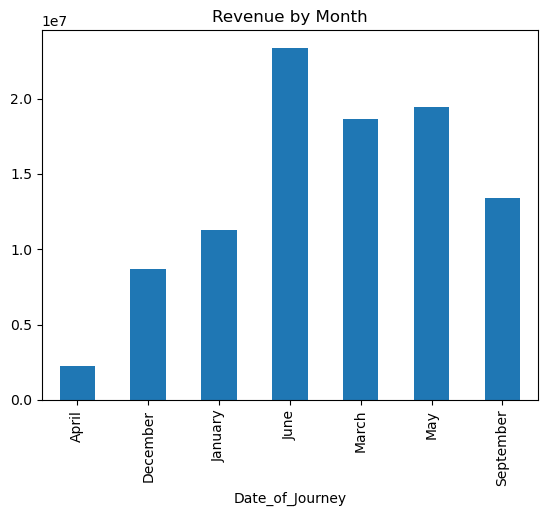

In [44]:
price_by_month = df.groupby(df['Date_of_Journey'].dt.month_name())['Price'].sum()
price_by_month.plot(kind='bar')
plt.title('Revenue by Month')
plt.show()

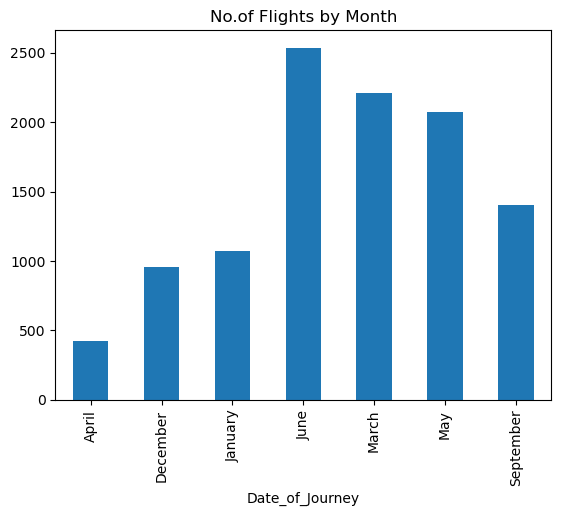

In [51]:
flights_per_month = df.groupby(df['Date_of_Journey'].dt.month_name())['Airline'].count()
flights_per_month.plot(kind='bar')
plt.title('No.of Flights by Month')
plt.show()

Here, we can clearly see that the month of March, May and June had most Revenue and in these months very high number of Aeroplane take flight.

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

<AxesSubplot: xlabel='Date_of_Journey', ylabel='Price'>

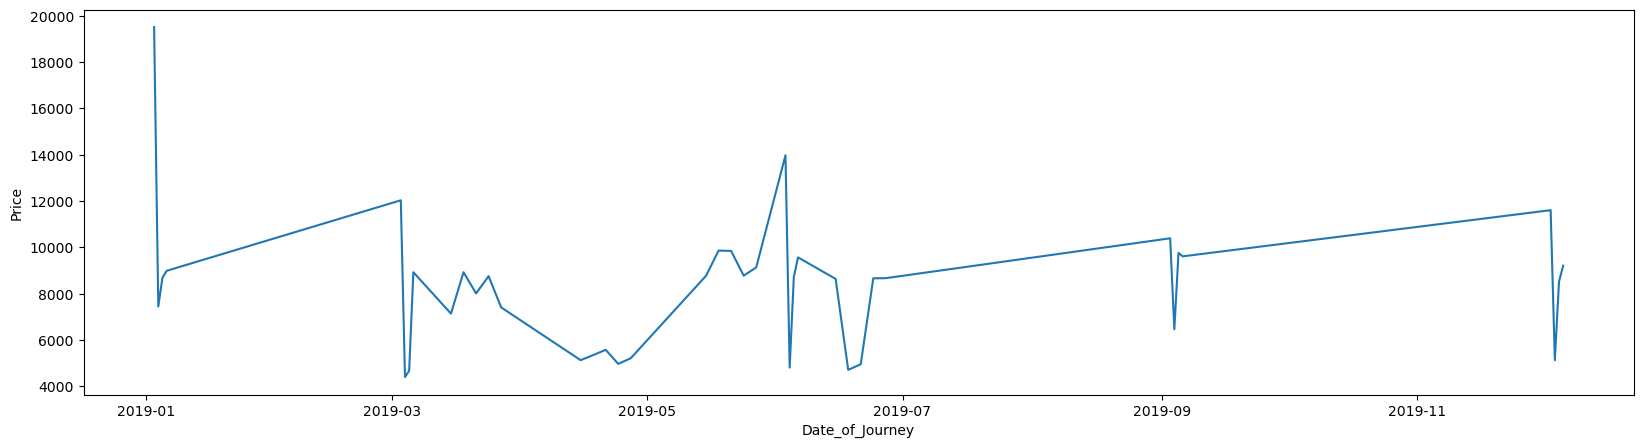

In [56]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(df.sort_values('Date_of_Journey'),x='Date_of_Journey',y='Price',errorbar=None)

<AxesSubplot: xlabel='Date_of_Journey', ylabel='Price'>

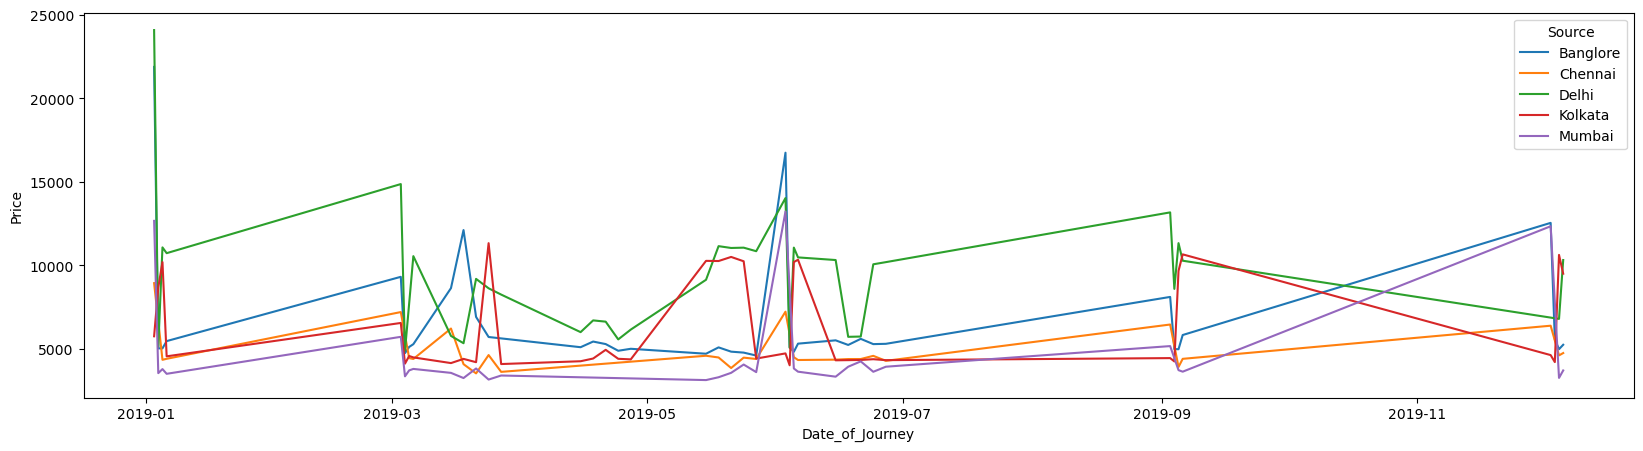

In [57]:
plt.figure(figsize=(20,5))
sns.lineplot(df.sort_values('Date_of_Journey'),x='Date_of_Journey',y='Price',hue='Source',errorbar=None)

<AxesSubplot: xlabel='Date_of_Journey', ylabel='Price'>

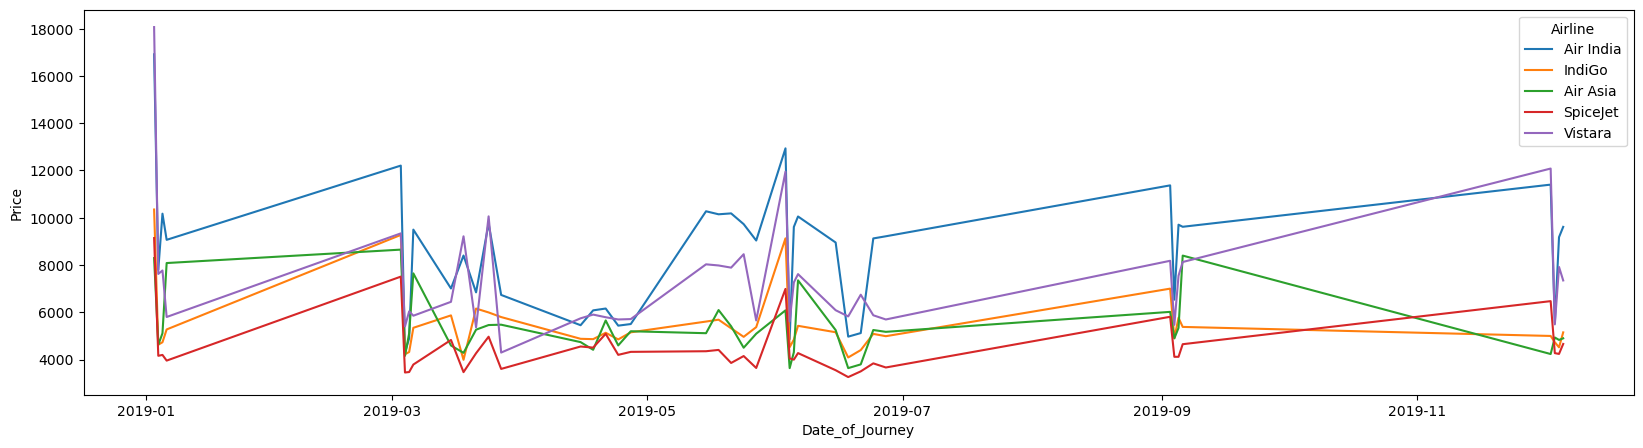

In [61]:
plt.figure(figsize=(20,5))
sns.lineplot(df.sort_values('Date_of_Journey'),x='Date_of_Journey',y='Price',hue='Airline',errorbar=None,hue_order=['Air India', 'IndiGo', 'Air Asia', 'SpiceJet', 'Vistara'])

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [66]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

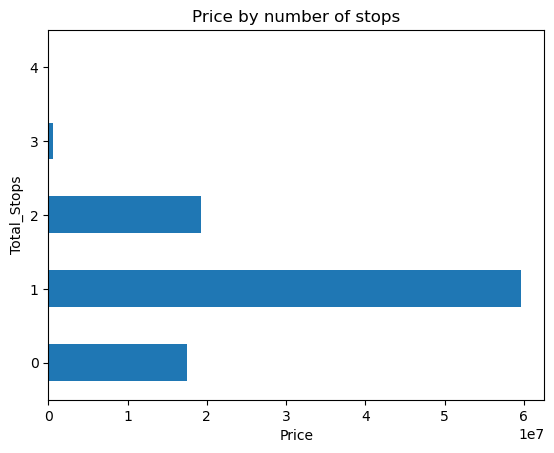

In [70]:
price_by_stops = df.groupby(df['Total_Stops'])['Price'].sum()
price_by_stops.plot(kind='barh',xlabel='Price',title='Price by number of stops')
plt.show()

To identify the factors that affect flight prices from the Flight Price dataset, I would analyze the following features:

Date_of_Journey: Analyze the variation in flight prices based on the day, week, month, or season of travel to identify if there are any trends in the dataset.

Airline: Analyze the variation in flight prices based on the airline to identify if there are any airlines that offer consistently lower or higher prices than others.

Source and Destination: Analyze the variation in flight prices based on the source and destination to identify if there are any routes that are more expensive than others.

Total_Stops: Analyze the variation in flight prices based on the number of stops to identify if there is a correlation between the number of stops and ticket prices.

To present my findings to the management team, I would create a report that includes visualizations to help them easily understand the data. For example, I could create a heatmap that shows the average ticket prices by month and airline, and a scatterplot that shows the relationship between ticket prices and the number of stops.

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
df.shape

(10841, 13)

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [107]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [108]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [144]:
df.drop(index=df.query("Category=='1.9'").index, inplace=True)

In [111]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [145]:
df['Rating'].isna().sum()

1474

In [146]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [147]:
df['Rating'].isna().sum()

0

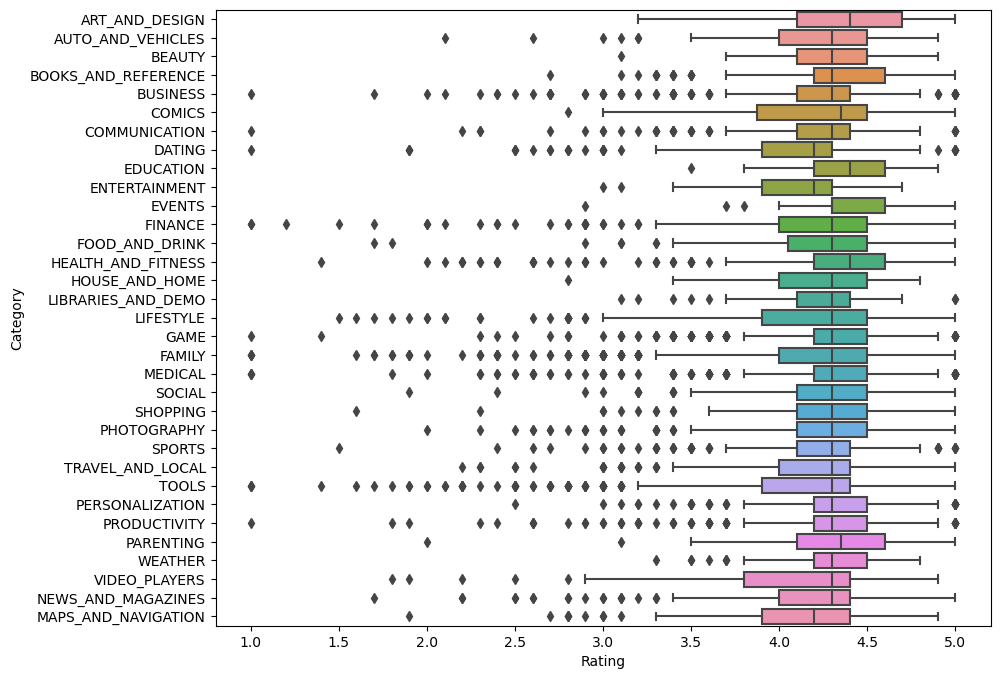

In [115]:
plt.figure(figsize=(10, 8))
sns.boxplot(df,y='Category',x='Rating',orient='h')
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [116]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Rating had 1474 missing values and we imputed them with median value. The other columns don't have much missing values.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [118]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [123]:
def numerical_size(size):
    if size == 'Varies with device':
        return np.nan
    
    size = size.replace('k','')
    size = size.replace('M','000')
    
    return float(size)

In [125]:
df['Size'] = df['Size'].apply(numerical_size)

In [128]:
df['Size'].fillna(df['Size'].median(),inplace=True)

Text(0.5, 0, 'Size (in KB)')

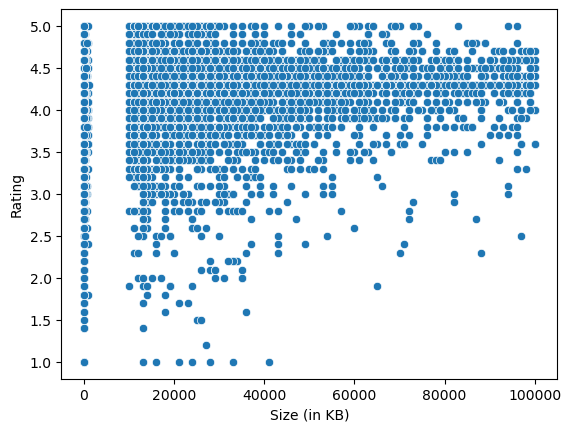

In [132]:
sns.scatterplot(df,x='Size',y='Rating')
plt.xlabel('Size (in KB)')

As the size of the app increases the ratings of the app remains high.

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [133]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [148]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [149]:
df['Type'].isna().sum()

1

In [150]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [151]:
df.drop(9148,inplace=True)


In [152]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [153]:
def numerical_price(price):
    price = price.replace('$','')
    return float(price)


In [157]:
df['Price']=df['Price'].apply(numerical_price)

<AxesSubplot: xlabel='Type'>

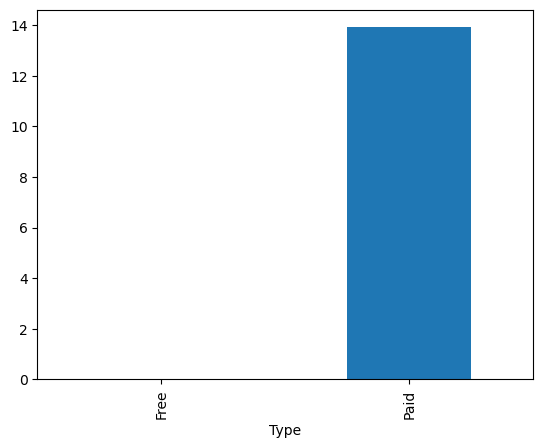

In [164]:
df.groupby('Type')['Price'].mean().plot(kind='bar')

In [177]:
print('Average price of Paid apps is ${0:.2f}'.format(df[df['Type']=='Paid']['Price'].mean()))

Average price of Paid apps is $13.92


# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [180]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [181]:
def numeric_installs(installs):
    installs = installs.replace('+','').replace(',','')
    return int(installs)


In [183]:
df['Installs']=df['Installs'].apply(numeric_installs)

In [193]:
df = df.drop_duplicates('App')

In [194]:
df.sort_values('Installs',ascending=False).head(10)[['App','Installs']]

,App,Installs
336,WhatsApp Messenger,1000000000
152,Google Play Books,1000000000
1654,Subway Surfers,1000000000
3117,Maps - Navigate & Explore,1000000000
340,Gmail,1000000000
2545,Instagram,1000000000
2544,Facebook,1000000000
338,Google Chrome: Fast & Secure,1000000000
2554,Google+,1000000000
3665,YouTube,1000000000


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories in the Google Playstore dataset, we can approach the task in the following way:

Analyze the Category column to identify the most common app categories in the dataset.

Analyze the Installs column to identify the most popular app categories based on the number of installs.

Compare the results of steps 2 and 3 to make recommendations to the company.

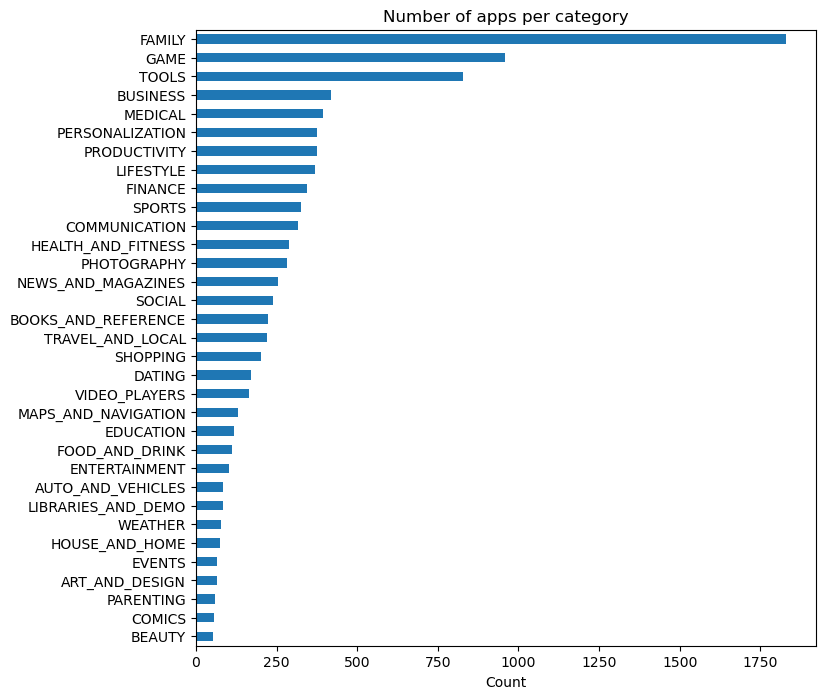

In [212]:
df['Category'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))
plt.xlabel('Count')
plt.title('Number of apps per category')
plt.show()

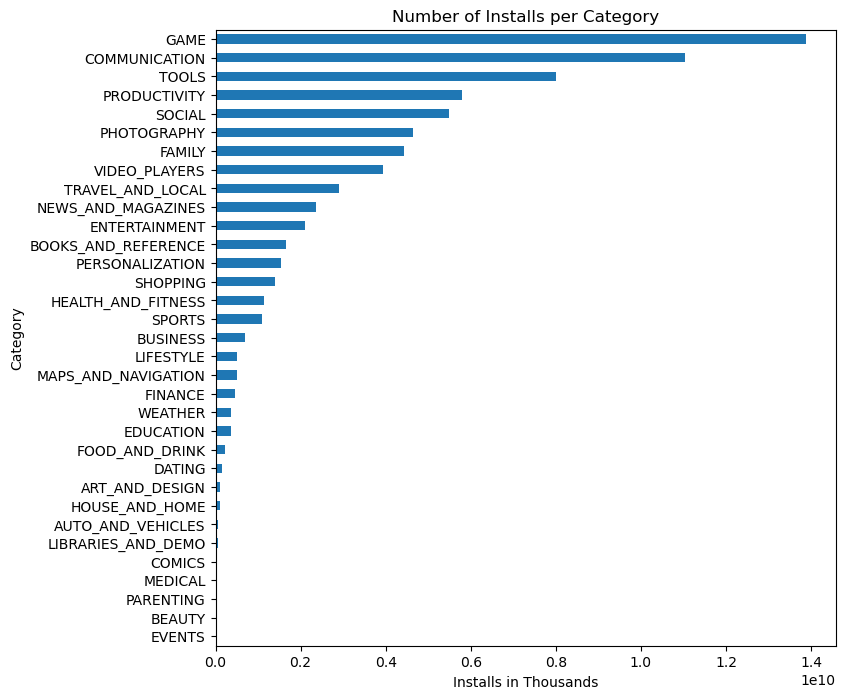

In [214]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))
plt.xlabel('Installs in Thousands')
plt.title('Number of Installs per Category')
plt.show()

From the above two plots, **Game , Communication , Tools** and **Productivity** are the most popular categories

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Playstore dataset, we can analyze the following features:

Developer: We can analyze the number of apps published by each developer to identify the most prolific developers.

Rating: We can analyze the average rating of apps published by each developer to identify the developers with the highest-rated apps.

Installs: We can analyze the total number of app installs for each developer to identify the most popular developers.
To present our findings, we can use the following data visualizations:

Bar chart: We can use a bar chart to visualize the number of apps published by each developer.

Scatter plot: We can use a scatter plot to visualize the relationship between the average rating and the number of app installs for each developer.

Heatmap: We can use a heatmap to visualize the total number of app installs for each developer by app category.

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore, the following features can be analyzed:

Number of Installs: The number of installs of the top apps can be analyzed to identify trends and patterns that indicate the best time to launch a new app.

Reviews and Ratings: The reviews and ratings of the top apps can be analyzed to identify the most favorable time for launching a new app.

Category: The category of the app can also play a significant role in identifying the best time to launch a new app. For instance, gaming apps may have a different trend as compared to education or productivity apps.

Seasonal Trends: Some apps may have seasonal relevance. For example, an app related to tax filing may be launched around the tax season.

Data visualizations that can be used to present the findings include:

Line charts: To show the trend of installs, ratings, and reviews over time.

Heat maps: To show the popularity of app categories across different times of the year.

Bar charts: To show the comparison of different categories or apps based on installs, ratings, or reviews.

Scatter plots: To show the correlation between the number of installs and ratings or reviews over time.